In [2]:
import pandas as pd
from prophet import Prophet
import plotly.express as px
import requests
import json

In [5]:
df = pd.read_excel(r'C:\Users\juand\OneDrive\Documentos\Proyecto Modelo Codigo\api-monitoreo-financiero\src\data\DEUDA.xlsx')
df.head()

,Fecha,Moneda,Interna1_Billo,Externa_Billo,Total_Billo
0,2018-01-31,1,"273,6","137,9","411,5"
1,2018-02-28,1,"279,1","138,3","417,3"
2,2018-03-31,1,"280,6","136,6","417,1"
3,2018-04-30,1,"287,8","138,0","425,8"
4,2018-05-31,1,"293,7","140,6","434,4"


In [6]:
df.shape
df.isnull().sum()

Fecha             0
Moneda            0
Interna1_Billo    0
Externa_Billo     0
Total_Billo       0
dtype: int64

In [69]:
df['ds'] = pd.to_datetime(df['Fecha'],format='%Y%m%d')
print(df)

        Fecha  Moneda Interna1_Billo Externa_Billo Total_Billo         ds  \
0  2018-01-31       1          273,6         137,9       411,5 2018-01-31   
1  2018-02-28       1          279,1         138,3       417,3 2018-02-28   
2  2018-03-31       1          280,6         136,6       417,1 2018-03-31   
3  2018-04-30       1          287,8         138,0       425,8 2018-04-30   
4  2018-05-31       1          293,7         140,6       434,4 2018-05-31   
..        ...     ...            ...           ...         ...        ...   
62 2022-10-31       1          495,9         353,0       848,9 2022-10-31   
63 2022-12-31       1          507,3         365,5       872,7 2022-12-31   
64 2023-01-31       1          513,9         353,0       867,0 2023-01-31   
65 2023-02-28       1          509,6         373,9       883,4 2023-02-28   
66 2023-04-30       1          532,0         359,1       891,1 2023-04-30   

        y  
0   273.6  
1   279.1  
2   280.6  
3   287.8  
4   293.7  
.. 

In [58]:
df['y']= pd.to_numeric(df['Externa_Billo'].str.replace(',', '.'), errors='coerce')


C:\Users\juand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [13]:
m= Prophet()
m.fit(df)

15:20:26 - cmdstanpy - INFO - Chain [1] start processing
15:20:27 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
future = m.make_future_dataframe(periods=1,freq='M')
future.tail()

,ds
63,2023-05-31
64,2023-06-30
65,2023-07-31
66,2023-08-31
67,2023-09-30


In [16]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower', 'yhat_upper' ]]

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-31,133.346112,116.022828,151.352809
1,2018-02-28,132.418637,115.475845,149.973382
2,2018-03-31,131.534445,114.468452,149.656490
3,2018-04-30,136.483869,118.807682,155.652873
4,2018-05-31,132.386120,113.882816,149.260137
...,...,...,...,...
63,2023-05-31,348.401213,331.596689,365.955588
64,2023-06-30,344.323315,326.236975,362.887087
65,2023-07-31,340.883045,324.079760,359.079501
66,2023-08-31,348.091514,330.732537,366.452110


C:\Users\juand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\juand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


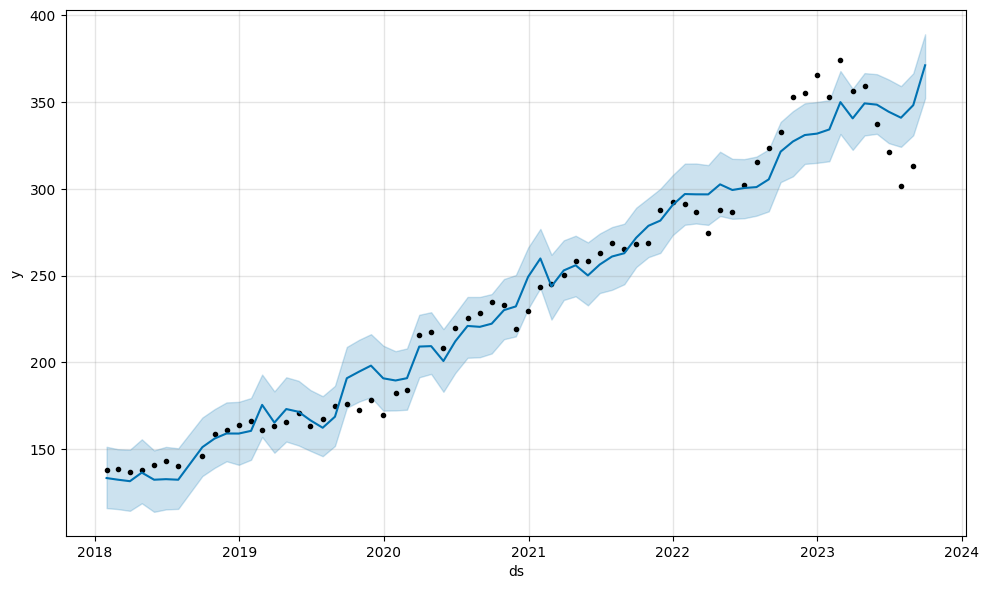

In [17]:
fig1= m.plot(forecast)

In [18]:
args = forecast[['ds','yhat','yhat_lower', 'yhat_upper']]

In [71]:
df['y']= pd.to_numeric(df['Interna1_Billo'].str.replace(',', '.'), errors='coerce')
print(df)

        Fecha  Moneda Interna1_Billo Externa_Billo Total_Billo         ds  \
0  2018-01-31       1          273,6         137,9       411,5 2018-01-31   
1  2018-02-28       1          279,1         138,3       417,3 2018-02-28   
2  2018-03-31       1          280,6         136,6       417,1 2018-03-31   
3  2018-04-30       1          287,8         138,0       425,8 2018-04-30   
4  2018-05-31       1          293,7         140,6       434,4 2018-05-31   
..        ...     ...            ...           ...         ...        ...   
62 2022-10-31       1          495,9         353,0       848,9 2022-10-31   
63 2022-12-31       1          507,3         365,5       872,7 2022-12-31   
64 2023-01-31       1          513,9         353,0       867,0 2023-01-31   
65 2023-02-28       1          509,6         373,9       883,4 2023-02-28   
66 2023-04-30       1          532,0         359,1       891,1 2023-04-30   

        y  
0   273.6  
1   279.1  
2   280.6  
3   287.8  
4   293.7  
.. 

In [61]:
m2= Prophet()
m2.fit(df)

16:16:26 - cmdstanpy - INFO - Chain [1] start processing
16:16:27 - cmdstanpy - INFO - Chain [1] done processing


In [66]:
future2 = m2.make_future_dataframe(periods=1,freq='A')
future2.tail()

,ds
63,2023-05-31
64,2023-06-30
65,2023-07-31
66,2023-08-31
67,2023-12-31


In [67]:
forecast2=m2.predict(future2)
forecast2[['ds','yhat','yhat_lower', 'yhat_upper' ]]

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-31,274.691549,271.246245,277.837014
1,2018-02-28,279.185502,276.055067,282.319046
2,2018-03-31,282.904239,279.617253,286.082853
3,2018-04-30,287.647714,284.464330,290.739777
4,2018-05-31,293.991611,290.726492,297.213088
...,...,...,...,...
63,2023-05-31,536.668215,533.500021,539.915277
64,2023-06-30,543.043465,539.788334,546.421938
65,2023-07-31,546.141799,542.872743,549.404436
66,2023-08-31,552.461121,549.048946,555.686676


C:\Users\juand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\juand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



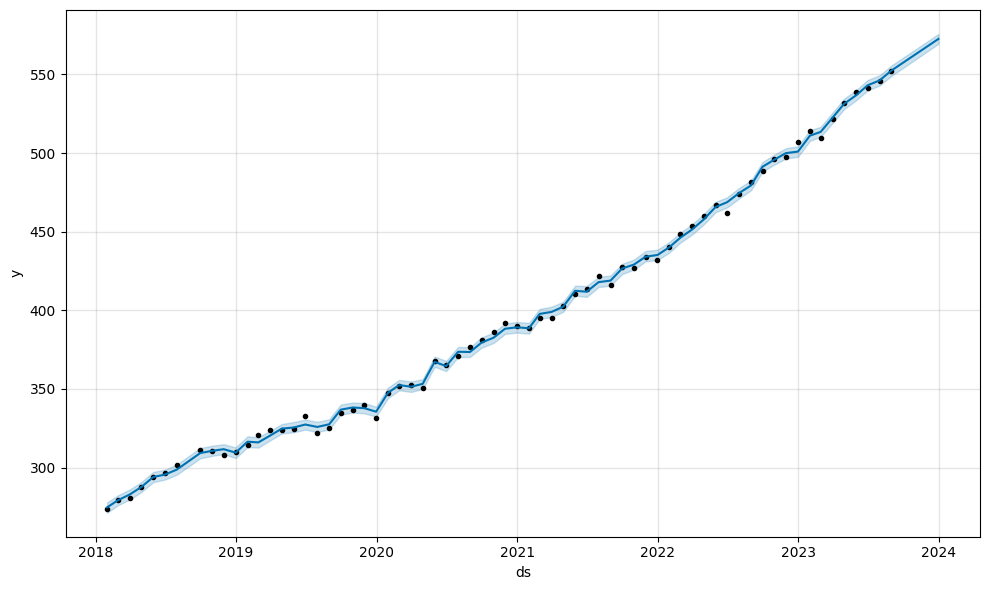

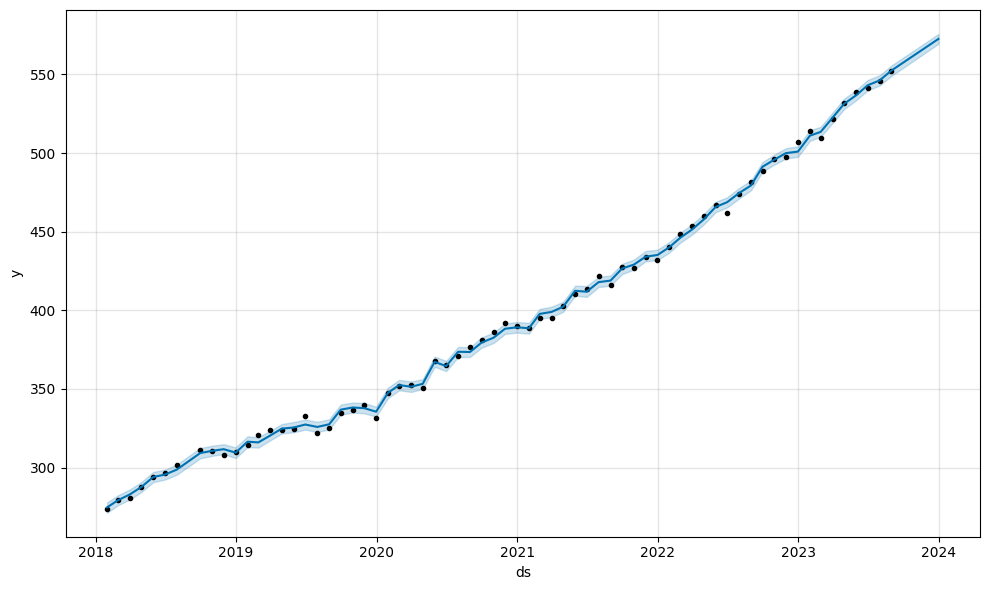

In [72]:
args2 = forecast2[['ds','yhat','yhat_lower', 'yhat_upper']]
m2.plot(forecast2)

In [77]:
df['y']= pd.to_numeric(df['Total_Billo'].str.replace(',', '.'), errors='coerce')


In [78]:
m3 = Prophet()
m3.fit(df)

16:27:34 - cmdstanpy - INFO - Chain [1] start processing
16:27:35 - cmdstanpy - INFO - Chain [1] done processing


In [79]:
future3 = m3.make_future_dataframe(periods=1,freq='A')
future3.tail()

,ds
63,2023-05-31
64,2023-06-30
65,2023-07-31
66,2023-08-31
67,2023-12-31


In [80]:
forecast3=m3.predict(future3)
forecast3[['ds','yhat','yhat_lower', 'yhat_upper' ]]

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-31,416.356312,398.493024,433.238200
1,2018-02-28,419.475247,401.982112,436.163507
2,2018-03-31,421.050422,404.660885,438.504093
3,2018-04-30,429.532365,412.676332,446.783201
4,2018-05-31,430.492525,414.131898,447.647234
...,...,...,...,...
63,2023-05-31,881.274278,863.614235,897.404562
64,2023-06-30,883.014411,865.325788,901.046568
65,2023-07-31,882.549817,865.437605,899.862288
66,2023-08-31,895.644351,879.410914,912.819540


C:\Users\juand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\juand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



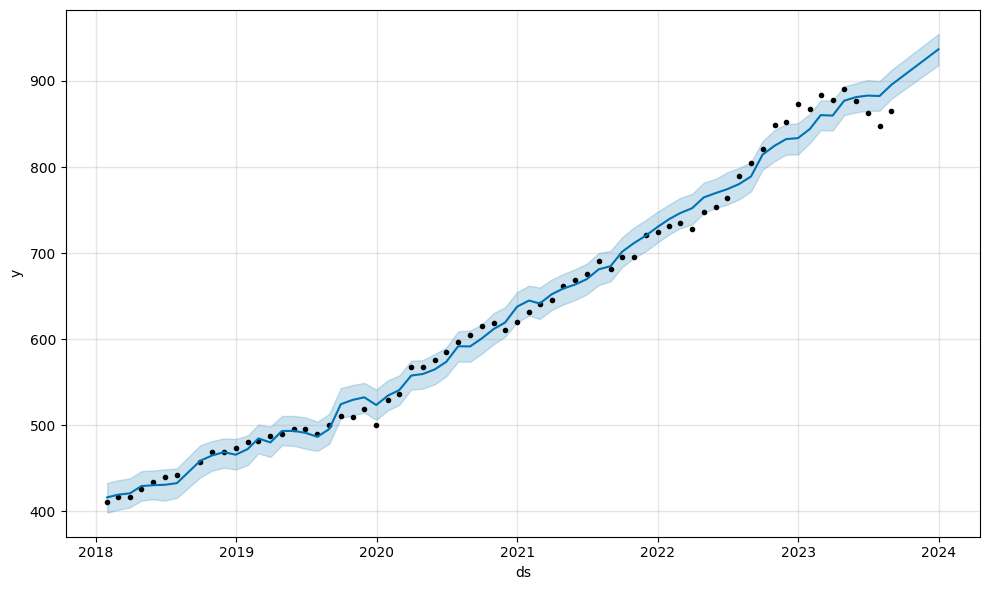

In [81]:
fg2 = m3.plot(forecast3)

In [82]:
args3 = forecast3[['ds','yhat','yhat_lower', 'yhat_upper']]

In [83]:
url = "http://localhost:4000/prediccion"
data = {"datos": args2.astype({'ds': 'str'}).to_dict(orient='records'),
        "datos2": args2.astype({'ds': 'str'}).to_dict(orient='records'),
        "datos3": args3.astype({'ds': 'str'}).to_dict(orient='records')  }
print("enviar", data )

reponse = requests.post(url=url,json=data)
print("status res:",reponse.status_code)
print("respuesta servidor:", reponse.text)

enviar {'datos': [{'ds': '2018-01-31', 'yhat': 133.34611188334657, 'yhat_lower': 116.02282768246128, 'yhat_upper': 151.3528088511078}, {'ds': '2018-02-28', 'yhat': 132.41863745585752, 'yhat_lower': 115.47584531436645, 'yhat_upper': 149.97338174819538}, {'ds': '2018-03-31', 'yhat': 131.534444941064, 'yhat_lower': 114.46845166965143, 'yhat_upper': 149.65649036184865}, {'ds': '2018-04-30', 'yhat': 136.4838687230755, 'yhat_lower': 118.80768172562544, 'yhat_upper': 155.6528731311217}, {'ds': '2018-05-31', 'yhat': 132.38611957803127, 'yhat_lower': 113.88281631196739, 'yhat_upper': 149.26013686291716}, {'ds': '2018-06-30', 'yhat': 132.70446795959657, 'yhat_lower': 115.28040084941033, 'yhat_upper': 151.29723325509286}, {'ds': '2018-07-31', 'yhat': 132.3772233167394, 'yhat_lower': 115.58833678442228, 'yhat_upper': 150.47424689752634}, {'ds': '2018-09-30', 'yhat': 151.1364057973057, 'yhat_lower': 134.47591033898968, 'yhat_upper': 168.19937683329843}, {'ds': '2018-10-31', 'yhat': 156.113660182097

In [86]:

data = {"datos2": args2.astype({'ds': 'str'}).to_dict(orient='records')}
print("enviar", data )

reponse = requests.post(url=url,json=data)
print("status res:",reponse.status_code)
print("respuesta servidor:", reponse.text)

enviar {'datos2': [{'ds': '2018-01-31', 'yhat': 274.69154854696757, 'yhat_lower': 271.2462454849961, 'yhat_upper': 277.8370144989881}, {'ds': '2018-02-28', 'yhat': 279.1855020392322, 'yhat_lower': 276.05506712883226, 'yhat_upper': 282.3190456651161}, {'ds': '2018-03-31', 'yhat': 282.9042387874805, 'yhat_lower': 279.6172531185886, 'yhat_upper': 286.0828526902396}, {'ds': '2018-04-30', 'yhat': 287.6477144332647, 'yhat_lower': 284.4643295357247, 'yhat_upper': 290.7397770901996}, {'ds': '2018-05-31', 'yhat': 293.99161081385955, 'yhat_lower': 290.72649192044327, 'yhat_upper': 297.2130881617828}, {'ds': '2018-06-30', 'yhat': 295.5049904704561, 'yhat_lower': 292.3216057763245, 'yhat_upper': 298.63433104226544}, {'ds': '2018-07-31', 'yhat': 298.6873841588197, 'yhat_lower': 295.4480199638597, 'yhat_upper': 301.88922815959916}, {'ds': '2018-09-30', 'yhat': 309.21708442995214, 'yhat_lower': 305.8989038153863, 'yhat_upper': 312.4498483379085}, {'ds': '2018-10-31', 'yhat': 310.6382107887571, 'yhat_

In [87]:

data = {"datos3": args3.astype({'ds': 'str'}).to_dict(orient='records')  }
print("enviar", data )

reponse = requests.post(url=url,json=data)
print("status res:",reponse.status_code)
print("respuesta servidor:", reponse.text)

enviar {'datos3': [{'ds': '2018-01-31', 'yhat': 416.3563120549627, 'yhat_lower': 398.4930235762413, 'yhat_upper': 433.2382004698355}, {'ds': '2018-02-28', 'yhat': 419.47524653143824, 'yhat_lower': 401.9821124208546, 'yhat_upper': 436.1635067441071}, {'ds': '2018-03-31', 'yhat': 421.0504221375666, 'yhat_lower': 404.66088463257375, 'yhat_upper': 438.50409307759725}, {'ds': '2018-04-30', 'yhat': 429.53236533932676, 'yhat_lower': 412.6763323459217, 'yhat_upper': 446.7832012450736}, {'ds': '2018-05-31', 'yhat': 430.49252510995666, 'yhat_lower': 414.1318976045944, 'yhat_upper': 447.6472336270204}, {'ds': '2018-06-30', 'yhat': 431.02926765476155, 'yhat_lower': 412.5055587730349, 'yhat_upper': 448.86284186839976}, {'ds': '2018-07-31', 'yhat': 432.8869011619841, 'yhat_lower': 415.8100899183391, 'yhat_upper': 450.0258589911235}, {'ds': '2018-09-30', 'yhat': 458.97514695591553, 'yhat_lower': 439.64958575557773, 'yhat_upper': 477.0331060663526}, {'ds': '2018-10-31', 'yhat': 465.12783449365554, 'yh